## The Schwarzschild Metric

The Schwarzschild metric in natural units ($G = c = 1$) is given by:

$$ds^2 = -\left(1-\frac{2M}{r}\right)c^2dt^2 + \left(1-\frac{2M}{r}\right)^{-1}dr^2 + r^2(d\theta^2 + \sin^2\theta d\varphi^2)$$

where $M$ is the mass of the central object.

### The Geodesic Equation

The geodesic equation is:

$$\frac{d^2x^\mu}{d\lambda^2} + \Gamma^\mu_{\alpha\beta}\frac{dx^\alpha}{d\lambda}\frac{dx^\beta}{d\lambda} = 0$$

where $\Gamma^\mu_{\alpha\beta}$ are the Christoffel symbols and $\lambda$ is an affine parameter.

For the Schwarzschild metric, we can use the conserved quantities:
- Energy per unit mass: $\frac{E}{m} = \left(1-\frac{2M}{r}\right)c^2\frac{dt}{d\lambda}$
- Angular momentum per unit mass: $\frac{L}{m} = r^2\sin^2\theta\frac{d\phi}{d\lambda}$
- We will take $\theta = \frac{\pi}{2}$.

The equation of motion for $r$ is then :
$$-\varepsilon c^2 = - \frac{E^2}{m^2c^2\left(1-\frac{r_s}{r}\right)} + \frac{\frac{dr}{d\lambda}^2}{1-\frac{r_s}{r}}+\frac{L^2}{m^2r^2}$$
with $\varepsilon = 0$ for massless particles and $1$ for massive particles. Let us rewrite it as :

$$\frac{dr}{d\lambda}^2 = \frac{E^2}{m^2c^2} - c^2\left(1-\frac{r_s}{r}\right)\left(\varepsilon + \frac{L^2}{m^2c^2r^2}\right)$$

By denoting $x= \frac{r}{r_s}$ and $l=\frac{L}{mcr_s}$ :
$$\frac{dx}{d\lambda}^2 = \frac{E^2}{m^2c^2r_s^2} - \frac{c^2}{r_s^2}\left(1-\frac{1}{x}\right)\left(\varepsilon + \frac{l^2}{x^2}\right)$$

Differentiating wrt $\lambda$:
$$\frac{d^2x}{d\lambda^2} =  -\frac{c^2}{2r_s^2}\left(\frac{\varepsilon}{x^2} + 3\frac{l^2}{x^4} - 2\frac{l^2}{x^3}\right)$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

r_s = 2.953
c = 299792.458

def geodesic_equation(state, l, epsilon):
    """
    The geodesic equation for the Schwarzschild metric.
        
    Parameters:
    -----------
    state: [x, phi, dx/dtau, dphi/dtau]
    L: angular momentum per unit mass
    epsilon: 0 for massless particles, 1 for massive particles
        
    Returns:
    --------
    [dr/dtau, dphi/dtau, d^2r/dtau^2, d^2phi/dtau^2]
    """
    x, phi, x_dot, phi_dot = state
        
    # Second derivatives
    x_ddot = (-epsilon/(2*x**2) + l**2/(x**3) - (3/2)*l**2/x**4)*(c/r_s)**2
    phi_ddot = -2*x_dot*phi_dot/x
        
    return [x_dot, phi_dot, x_ddot, phi_ddot]
    
def solve_geodesic(r0, phi0, r_dot0, l, epsilon, t_start, t_end, n_points):
    """
    Solve the geodesic equation.
        
    Parameters:
    -----------
    r0: initial radial coordinate
    phi0: initial angular coordinate
    r_dot0: initial radial velocity
    l: dimensionless angular momentum
    epsilon: 0 for massless particles, 1 for massive particles
    tau_span: (tau_start, tau_end) for integration
    n_points: number of evaluations of the solution
        
    Returns:
    --------
    Solution object from solve_ivp
    """
    #Initial x
    x0 = r0/r_s
    
    # Initial phi_dot from angular momentum
    phi_dot0 = (l/x0**2)*c/r_s
        
    #Initial state
    initial_state = [x0, phi0, r_dot0/r_s, phi_dot0]
        
    # Solve the ODE
    solution = solve_ivp(
        lambda t, y: geodesic_equation(y, l, epsilon),
        [t_start, t_end],
        initial_state,
        method='RK45',
        t_eval = np.linspace(t_start, t_end, n_points),
        rtol=1e-10,
        atol=1e-10
    )
        
    return solution
    
def plot_geodesic(solution):
    """Plot the geodesic in polar coordinates."""
    r = solution.y[0]*r_s
    phi = solution.y[1]
        
    # Convert to Cartesian coordinates for plotting
    x = r * np.cos(phi)
    y = r * np.sin(phi)
        
    fig, ax = plt.subplots(figsize=(10, 8))
        
    # Plot the central mass (black hole)
    event_horizon = plt.Circle((0, 0), r_s, color='black', fill=True)
    ax.add_artist(event_horizon)
        
    # Plot the trajectory
    ax.plot(x, y, 'r-', label='Geodesic')
    ax.plot(x[0], y[0], 'go', label='Start')
    ax.plot(x[-1], y[-1], 'bo', label='End')
        
    # Set equal aspect ratio
    ax.set_aspect('equal')
    ax.grid(True)
    ax.set_xlabel('x (km)')
    ax.set_ylabel('y (km)')
    #ax.set_title(title)
    ax.legend()
        
    # Set limits based on the trajectory
    max_range = max(np.max(np.abs(x)), np.max(np.abs(y)))
    ax.set_xlim(-max_range*1.1, max_range*1.1)
    ax.set_ylim(-max_range*1.1, max_range*1.1)
        
    plt.show()

## The Entangled Relativity Metric

The Schwarzschild metric in natural units ($G = c = 1$) is given by:

$$ds^2 = -\lambda_0 c^2dt^2 + \frac{1}{\lambda_r}dr^2 + h\left(d\theta^2 + \sin^2\theta d\varphi^2\right)$$

where :
$$\lambda_0 = \left(1-\frac{u}{r}\right)\left(1-\frac{v}{r}\right)^{\frac{15}{13}}$$
$$\lambda_r = \left(1-\frac{u}{r}\right)\left(1-\frac{v}{r}\right)^{\frac{7}{13}}$$
$$h = r^2\left(1-\frac{v}{r}\right)^{\frac{6}{13}}$$

and $u$ and $v$ are related to the mass and the charge of the central object via :
$$\frac{2GM}{c^2}=r_s = u + \frac{11}{13}v$$
$$\frac{GQ^2}{4\pi\epsilon_0c^4} =r_Q^2= \frac{12}{13}uv$$

The scalar field is given by :
$$\phi = \frac{1}{\left(1-\frac{v}{r}\right)^{\frac{2}{13}}}$$

### The Modified Geodesic Equation

The geodesic equation is:

$$\frac{d^2x^\mu}{d\lambda^2} + \Gamma^\mu_{\alpha\beta}\frac{dx^\alpha}{d\lambda}\frac{dx^\beta}{d\lambda} = -\left(\varepsilon g^{\mu\nu}+\frac{dx^\mu}{d\lambda}\frac{dx^\nu}{d\lambda}\right)\frac{\partial_\nu \phi}{\phi}$$

where $\Gamma^\mu_{\alpha\beta}$ are the Christoffel symbols and $\lambda$ is an affine parameter.

For the solution of these equations, we can use the conserved quantities:
- Energy per unit mass: $\frac{E}{m} = c^2\lambda_0\phi\frac{dt}{d\lambda}$
- Angular momentum per unit mass: $\frac{L}{m} = h\phi\frac{d\varphi}{d\lambda}$
- We will take $\theta = \frac{\pi}{2}$.

The equation of motion is :
$$\frac{dr}{d\lambda}^2 = \frac{\lambda_r}{\phi^2\lambda_0}\frac{E^2}{m^2c^2} - c^2\lambda_r\left(\varepsilon+\frac{L^2}{\phi^2h m^2c^2}\right)$$

After simplifying :
$$\frac{dr}{d\lambda}^2 = \left(1-\frac{v}{r}\right)^{-\frac{4}{13}}\frac{E^2}{m^2c^2} - c^2\left(1-\frac{u}{r}\right)\left(1-\frac{v}{r}\right)^{\frac{7}{13}} \left(\varepsilon+\frac{L^2}{r^2 \left(1-v/r\right)^{\frac{2}{13}} m^2c^2}\right)$$
$$\left(\left(1-\frac{v}{r}\right)^{\frac{2}{13}}\frac{dr}{d\lambda}\right)^2 = \frac{E^2}{m^2c^2} - c^2\left(1-\frac{u}{r}\right)\left(1-\frac{v}{r}\right)^{\frac{11}{13}} \left(\varepsilon+\frac{L^2}{r^2 \left(1-v/r\right)^{\frac{2}{13}} m^2c^2}\right)$$

In [3]:
def er_equation(state, l, epsilon, r_q, u, v):
    """
    The equation of motion for the Entangled Relativity metric.
        
    Parameters:
    -----------
    tau: affine parameter
    state: [x, phi, dx/dtau, dphi/dtau] dimensionless for x = r/r_s
    E: energy per unit mass
    L: dimensionless angular momentum
    epsilon: 0 for massless particles, 1 for massive particles
        
    Returns:
    --------
    [dx/dtau, dphi/dtau, d^2x/dtau^2, d^2phi/dtau^2]
    """

    x, phi, x_dot, phi_dot = state

    a = 1-u/x
    b = 1-v/x
    
    # Second derivatives
    A = 2*v*x_dot**2/(13*x**2*b)
    B = (c/r_s)**2*u*b**(7/13)/(2*x**2)*(epsilon + l**2/(x**2*b**(2/13)))
    C = (c/r_s)**2*11*v*a/(26*x**2*b**(6/13))*(epsilon + l**2/(x**2*b**(2/13)))
    D = (c/r_s)**2*a*l**2/(x**4)*(x*b**(5/13)+v/(13*b**(8/13)))
    
    x_ddot = -A-B-C+D
    phi_ddot = -2*x_dot*phi_dot/x - 4*v*x_dot*phi_dot/(13*b)
        
    return [x_dot, phi_dot, x_ddot, phi_ddot]
    
def solve_er(r0, phi0, r_dot0, l, epsilon, Q, t_start, t_end, n_points):
    """
    Solve the geodesic equation.
        
    Parameters:
    -----------
    r0: initial radial coordinate
    phi0: initial angular coordinate
    r_dot0: initial radial velocity
    L: angular momentum per unit mass
    epsilon: 0 for massless particles, 1 for massive particles
    tau_span: (tau_start, tau_end) for integration
    n_points: number of evaluations of the solution
        
    Returns:
    --------
    Solution object from solve_ivp
    """
    r_q = Q*8.6*10**(-18)
    
    u = (1+np.sqrt(1-11*r_q**2/(3*r_s**2)))/2
    v = (13/11)*(1-np.sqrt(1-11*r_q**2/(3*r_s**2)))/2
    print(r_q, u, v)

    #Initial x
    x0 = r0/r_s
    
    # Initial phi_dot from angular momentum
    b0 = 1-v/x0
    phi_dot0 = l*c/(r_s*x0**2*b0**(4/13))

    #Initial state
    initial_state = [x0, phi0, r_dot0/r_s, phi_dot0]  
        
    # Solve the ODE
    solution = solve_ivp(
        lambda t, y: er_equation(y, l, epsilon, r_q, u, v),
        [t_start, t_end],
        initial_state,
        method='RK45',
        t_eval = np.linspace(t_start, t_end, n_points),
        rtol=1e-10,
        atol=1e-10
    )
        
    return solution
    
def plot_er(solution):
    """Plot the geodesic in polar coordinates."""
    r = r_s*solution.y[0]
    phi = solution.y[1]
        
    # Convert to Cartesian coordinates for plotting
    x = r*np.cos(phi)
    y = r*np.sin(phi)
        
    fig, ax = plt.subplots(figsize=(10, 8))
        
    # Plot the central mass (black hole)
    #u = M*(1+np.sqrt(1-11*Q**2/(12*M**2)))
    #event_horizon = plt.Circle((0, 0), u, color='black', fill=True)
    #ax.add_artist(event_horizon)
        
    # Plot the trajectory
    ax.plot(x, y, 'r-', label='Geodesic')
    ax.plot(x[0], y[0], 'go', label='Start')
    ax.plot(x[-1], y[-1], 'bo', label='End')
        
    # Set equal aspect ratio
    ax.set_aspect('equal')
    ax.grid(True)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    #ax.set_title(title)
    ax.legend()
        
    # Set limits based on the trajectory
    max_range = max(np.max(np.abs(x)), np.max(np.abs(y)))
    ax.set_xlim(-max_range*1.1, max_range*1.1)
    ax.set_ylim(-max_range*1.1, max_range*1.1)
        
    plt.show()

In [4]:
r_0 = 46001200
L_0 = 3064
sol_1 = solve_geodesic(r_0,0,0,3064,1,0,10**7,10**7)
sol_2 = solve_er(r_0,0,0,3064,1,0,0,10**7,10**7)

0.0 1.0 0.0


/home/theo-/miniforge3/envs/sage/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


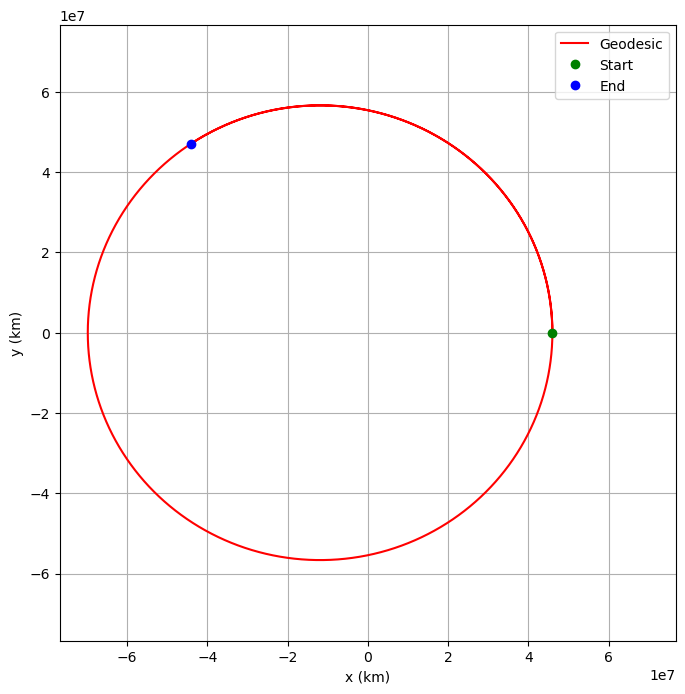

In [5]:
plot_geodesic(sol_1)

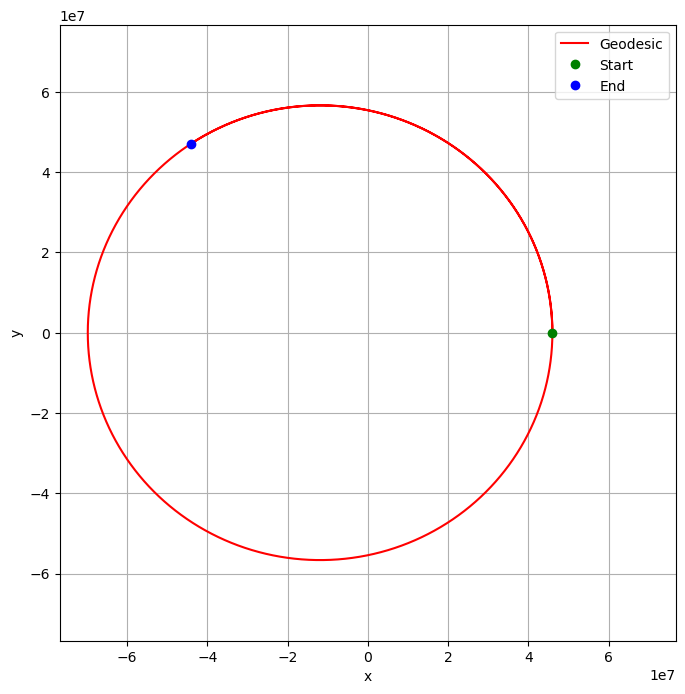

In [6]:
plot_er(sol_2)

In [7]:
def precession(solution):
    r_dot = solution.y[2]
    apsis = []
    for i in range(len(r_dot)-1):
        if r_dot[i]<=0 and r_dot[i+1]>0:
            apsis.append(solution.y[1][i])
    return apsis

In [8]:
apsis_mercury = precession(sol_1)
diff = apsis_mercury[1]-apsis_mercury[0]-2*np.pi
diff*(180/np.pi)*3600/0.24*100

np.float64(-31.059346728486474)